In [73]:
from sklearn.svm import SVC
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df = pd.DataFrame(df)

In [4]:
#df.to_csv(r'Social_Network_Ads.csv', index=False)

In [5]:
#df = df.drop(['User ID', 'Gender'], axis=1)

In [6]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [7]:
X = df.iloc[:,[2,3]]
y = df.iloc[:,4]
#y = np.array(y)
#y = y.ravel()

In [15]:
X.shape

(400, 2)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20)

In [20]:
X_train

,Age,EstimatedSalary
216,49,65000
170,21,88000
267,37,74000
358,40,71000
208,40,142000
...,...,...
101,28,59000
341,35,75000
39,27,31000
35,35,27000


In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [23]:
model = SVC(kernel = "linear", random_state=0)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [26]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [27]:
from sklearn import metrics
print('Accuracy Score: with linear kernel')

print(metrics.accuracy_score(y_test,y_Pred))

Accuracy Score: with linear kernel
0.7625


In [30]:
from sklearn.svm import SVC
model2 = SVC(kernel = 'rbf')
model2.fit(X_train, y_train)

# Predicting the test set results
Y_pred = model2.predict(X_test)

print('Accuracy Score: with default rbf kernel')
print(metrics.accuracy_score(y_test,y_pred))


Accuracy Score: with default rbf kernel
0.7625


In [32]:
from sklearn.svm import SVC
#classifier = SVC(kernel = 'rbf', gamma = 10,  random_state=0)  # 93% accuracy
model3 = SVC(kernel = 'rbf', gamma = 15, C=7,  random_state=0) 
model3.fit(X_train, y_train)

# Predicting the test set results

y_pred = model3.predict(X_test)

print('Accuracy Score On Test Data: with default rbf kernel')
print(metrics.accuracy_score(y_test,y_pred))


Accuracy Score On Test Data: with default rbf kernel
0.8375


In [34]:
svc=SVC(kernel='poly', degree = 4)
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)
print('Accuracy Score:with poly kernel and degree ')
print(metrics.accuracy_score(y_test,y_pred))   


Accuracy Score:with poly kernel and degree 
0.7875


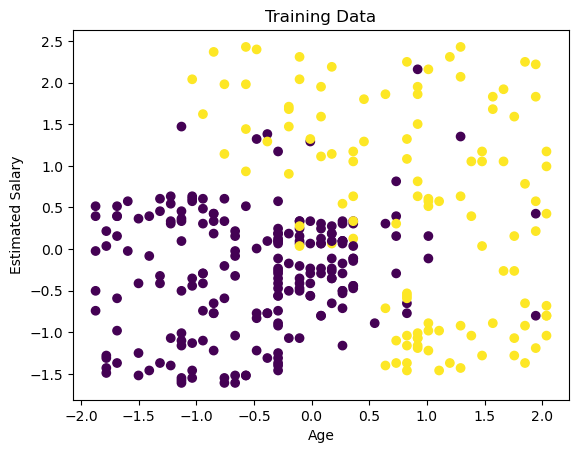

In [38]:
plt.scatter(X_train[:, 0], X_train[:, 1],c=y_train)  
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Training Data')
plt.show()


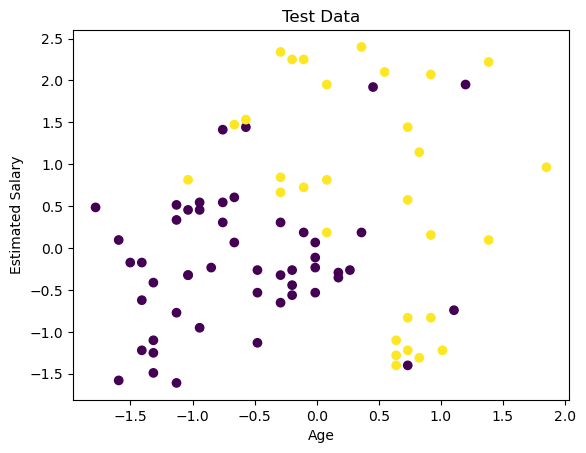

In [39]:
plt.scatter(X_test[:, 0], X_test[:, 1],c=y_test)  
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Test Data')
plt.show()


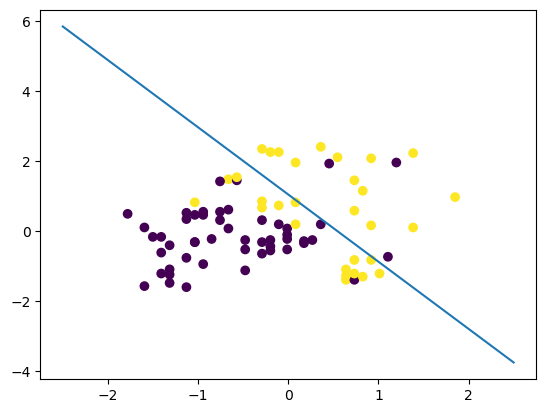

In [69]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', C = 5, random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Plot data points

plt.scatter(X_test[:, 0], X_test[:, 1],c=y_test)  
#plt.scatter(X_train[:, 0], X_train[:, 1],c=y_train) 

# Create the hyperplane
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (classifier.intercept_[0]) / w[1]  

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("on"), plt.show();